In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Symbolically verify matrix calculations in the Appendix

In [3]:
import numpy as np
from sympy import symbols
from sympy import Matrix
from sympy import eye
import sympy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sympy.init_printing(latex_mode='plain')

We have a seasonal model that has the following form. We will start more simply by assuming that interspecific and intraspecific habitat overlap are all 1 (i.e., a completely shared zoospore pool) and we can write the equation.

$$
 	\begin{aligned}
 		\frac{d S_{s,\tau}}{dt} &= f(N_{s,\tau}) - d_{s\tau} S_{s, \tau} -\beta_{s\tau} \theta_{s\tau} S_{s, \tau} Z_{\tau} + \nu_{s\tau} I_{s, \tau} - \phi' S_{s, \tau} + \phi' S_{s,\tau - \Delta t} \\
      \frac{d I_{s,\tau}}{dt} &= \beta_{s\tau} \theta_{s\tau} S_{s, \tau} Z_{\tau} - (\nu_{s\tau} + d_{s\tau} + \alpha_{s\tau}) I_{s, \tau} - \phi' I_{s,\tau} + \phi' I_{s,\tau - \Delta t}   \\
      \frac{d Z_{\tau}}{dt} &= \sum_{i \in \text{Species}} \lambda_{i\tau} \theta_{i\tau} I_{i, \tau} - \gamma_{\tau} Z_{\tau} - \phi'Z_{\tau} + \phi' Z_{\tau - \Delta t}
 	\end{aligned}
 	\label{eq:multihost_time}
$$
where $\tau$ is a particular time period during a year.  $\phi = 1 / \Delta t$ such that this is a discrete time approximation of a PDE with continuously varying seasonal traits.  Note that by specifically indexing by "time-in-the-season" we can be explicit regarding how moments in time contribute to pathogen persistence and $R_0$.  

We want to compute a community-level $R_{0, T}$ for this system of equations, integrated across an entire seasonal period $T$. We want to write it in such a way that we can parameterize it using commonly collected field data and time-in-the-season species-specific $R_{0, $ values. 

First, using a result from our Bd landscape paper, let's start by writing down the Jacobian matrix at each point in time.  For representational simplicity, assume there are three seasonal time periods $T = 3$ and two species $S = 2$.  The Jacobian matrix of the "disease" state variables looks like (where $I$ variables are indexed by (species, time).  So $I_{12}$ is species 1 in time period 2

$$
\begin{bmatrix}
    & I_{11} & I_{21} & I_{12} & I_{22} & I_{13} & I_{23} & Z_1 & Z_2 & Z_3 \\
    I_{11} & -(\nu_{11} + d_{11}) - \phi & 0 & 0 & 0 & \phi & 0 & \beta_{11}N_{11} & 0 & 0 \\
    I_{21} & 0 & -(\nu_{21} + d_{21}) - \phi & 0 & 0 & 0 & \phi & \beta_{21}N_{21} & 0 & 0 \\
    I_{12} & \phi & 0  & -(\nu_{12} + d_{12}) - \phi & 0 & 0 & 0 & 0 & \beta_{12}N_{12} & 0 \\
    I_{22} & 0 & \phi & 0 & -(\nu_{22} + d_{22}) - \phi & 0 & 0 & 0 & \beta_{22}N_{22} & 0 \\
    I_{13} & 0 & 0 & \phi & 0 & -(\nu_{13} + d_{13}) - \phi & 0 & 0 & 0 & \beta_{13}N_{13}\\
    I_{23} & 0 & 0 & 0 & \phi & 0 & -(\nu_{23} + d_{23}) - \phi & 0 & 0 & \beta_{23}N_{23} \\
    Z_1 & \lambda_{11} & \lambda_{21} & 0 & 0 & 0 & 0 & -\gamma_1 - \phi & 0 & \phi \\ 
    Z_2 & 0 & 0 & \lambda_{12} & \lambda_{22} & 0 & 0 & \phi & -\gamma_2 - \phi & 0 \\
    Z_3 & 0 & 0 & 0 & 0 & \lambda_{13} & \lambda_{23} & 0 & \phi & -\gamma_3 - \phi \\
\end{bmatrix}
$$

This matrix can be broken into the following components to make it easier to calculate.  Consider the following block matrix

$$
\begin{bmatrix}
\textbf{B} & \textbf{C} \\
\textbf{E} & \textbf{F}
\end{bmatrix}
$$

$\textbf{B}$ is a $6 \times 6$ matrix, $\textbf{C}$ is a $6 \times 3$ matrix, $\textbf{E}$ is a $3 \times 6$ matrix, and $\textbf{F}$ is a $3 \times 3$ matrix.

Now let

$$ \textbf{U} = \begin{bmatrix}
\textbf{B} & \textbf{0} \\
\textbf{E} & \textbf{F}
\end{bmatrix}
$$

and 

$$ \textbf{F'} = \begin{bmatrix}
\textbf{0} & \textbf{C} \\
\textbf{0} & \textbf{0}
\end{bmatrix}
$$

Seasonal $R_0$ is the spectral radius of $\mathbf{F}(-\textbf{U})^{-1}$. 

In Arino et al. (2005), we see that we can simplify the calculation of $R_0$, making it also far easier to link species by time $R_0$ values to seasonal $R_0$ value.  $R_0$ is the spectral radius of

$$ \textbf{R} = \textbf{C} (-\textbf{F})^{-1} \textbf{E} (-\textbf{B})^{-1}$$

We can see the utility of this reformulation by looking at $\textbf{C} (-\textbf{F})^{-1} \textbf{E}$, which can be written as

$$
\left[\begin{matrix}\frac{S_{11} \gamma'_{2} \gamma'_{3} \lambda_{11} \beta_{11}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{11} \gamma'_{2} \gamma'_{3} \lambda_{21} \beta_{11}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{11} \lambda_{12} \phi^{2} \beta_{11}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{11} \lambda_{22} \phi^{2} \beta_{11}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{11} \gamma'_{2} \lambda_{13} \phi \beta_{11}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{11} \gamma'_{2} \lambda_{23} \phi \beta_{11}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}}\\\frac{S_{21} \gamma'_{2} \gamma'_{3} \lambda_{11} \beta_{21}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{21} \gamma'_{2} \gamma'_{3} \lambda_{21} \beta_{21}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{21} \lambda_{12} \phi^{2} \beta_{21}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{21} \lambda_{22} \phi^{2} \beta_{21}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{21} \gamma'_{2} \lambda_{13} \phi \beta_{21}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{21} \gamma'_{2} \lambda_{23} \phi \beta_{21}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}}\\\frac{S_{12} \gamma'_{3} \lambda_{11} \phi \beta_{12}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{12} \gamma'_{3} \lambda_{21} \phi \beta_{12}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{12} \gamma'_{1} \gamma'_{3} \lambda_{12} \beta_{12}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{12} \gamma'_{1} \gamma'_{3} \lambda_{22} \beta_{12}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{12} \lambda_{13} \phi^{2} \beta_{12}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{12} \lambda_{23} \phi^{2} \beta_{12}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}}\\\frac{S_{22} \gamma'_{3} \lambda_{11} \phi \beta_{22}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{22} \gamma'_{3} \lambda_{21} \phi \beta_{22}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{22} \gamma'_{1} \gamma'_{3} \lambda_{12} \beta_{22}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{22} \gamma'_{1} \gamma'_{3} \lambda_{22} \beta_{22}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{22} \lambda_{13} \phi^{2} \beta_{22}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{22} \lambda_{23} \phi^{2} \beta_{22}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}}\\\frac{S_{13} \lambda_{11} \phi^{2} \beta_{13}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{13} \lambda_{21} \phi^{2} \beta_{13}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{13} \gamma'_{1} \lambda_{12} \phi \beta_{13}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{13} \gamma'_{1} \lambda_{22} \phi \beta_{13}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{13} \gamma'_{1} \gamma'_{2} \lambda_{13} \beta_{13}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{13} \gamma'_{1} \gamma'_{2} \lambda_{23} \beta_{13}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}}\\\frac{S_{23} \lambda_{11} \phi^{2} \beta_{23}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{23} \lambda_{21} \phi^{2} \beta_{23}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{23} \gamma'_{1} \lambda_{12} \phi \beta_{23}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{23} \gamma'_{1} \lambda_{22} \phi \beta_{23}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{23} \gamma'_{1} \gamma'_{2} \lambda_{13} \beta_{23}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}} & \frac{S_{23} \gamma'_{1} \gamma'_{2} \lambda_{23} \beta_{23}}{\gamma'_{1} \gamma'_{2} \gamma'_{3} - \phi^{3}}\end{matrix}\right]
$$

where $\gamma'_{i} = (\gamma_{i} + \phi)$.  We can recognize that the $R_0$ for species $i$ at time $\tau$ can be written as 

$$
R_{0, i, \tau} = \frac{\beta_{i\tau} S_{i\tau} \lambda_{i\tau}}{(\nu_{i\tau} + d_{i\tau}) \gamma_{\tau}}
$$

In the matrix $\textbf{C} (-\textbf{F})^{-1} \textbf{E}$ above, we can rearrange terms so express the matrix in terms of $R_{0, i, \tau}$. Doing this, we get

$$
\left[\begin{matrix}\frac{R_{0 11} b_{11} \gamma_{1} \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)}{- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)} & \frac{R_{0 11} b_{11} \gamma_{1} \lambda_{21} \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)}{\lambda_{11} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 11} b_{11} \gamma_{1} \lambda_{12} \phi^{2}}{\lambda_{11} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 11} b_{11} \gamma_{1} \lambda_{22} \phi^{2}}{\lambda_{11} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 11} b_{11} \gamma_{1} \lambda_{13} \phi \left(\gamma_{2} + \phi\right)}{\lambda_{11} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 11} b_{11} \gamma_{1} \lambda_{23} \phi \left(\gamma_{2} + \phi\right)}{\lambda_{11} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)}\\\frac{R_{0 21} b_{21} \gamma_{1} \lambda_{11} \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)}{\lambda_{21} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 21} b_{21} \gamma_{1} \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)}{- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)} & \frac{R_{0 21} b_{21} \gamma_{1} \lambda_{12} \phi^{2}}{\lambda_{21} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 21} b_{21} \gamma_{1} \lambda_{22} \phi^{2}}{\lambda_{21} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 21} b_{21} \gamma_{1} \lambda_{13} \phi \left(\gamma_{2} + \phi\right)}{\lambda_{21} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 21} b_{21} \gamma_{1} \lambda_{23} \phi \left(\gamma_{2} + \phi\right)}{\lambda_{21} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)}\\\frac{R_{0 12} b_{12} \gamma_{2} \lambda_{11} \phi \left(\gamma_{3} + \phi\right)}{\lambda_{12} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 12} b_{12} \gamma_{2} \lambda_{21} \phi \left(\gamma_{3} + \phi\right)}{\lambda_{12} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 12} b_{12} \gamma_{2} \left(\gamma_{1} + \phi\right) \left(\gamma_{3} + \phi\right)}{- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)} & \frac{R_{0 12} b_{12} \gamma_{2} \lambda_{22} \left(\gamma_{1} + \phi\right) \left(\gamma_{3} + \phi\right)}{\lambda_{12} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 12} b_{12} \gamma_{2} \lambda_{13} \phi^{2}}{\lambda_{12} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 12} b_{12} \gamma_{2} \lambda_{23} \phi^{2}}{\lambda_{12} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)}\\\frac{R_{0 22} b_{22} \gamma_{2} \lambda_{11} \phi \left(\gamma_{3} + \phi\right)}{\lambda_{22} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 22} b_{22} \gamma_{2} \lambda_{21} \phi \left(\gamma_{3} + \phi\right)}{\lambda_{22} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 22} b_{22} \gamma_{2} \lambda_{12} \left(\gamma_{1} + \phi\right) \left(\gamma_{3} + \phi\right)}{\lambda_{22} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 22} b_{22} \gamma_{2} \left(\gamma_{1} + \phi\right) \left(\gamma_{3} + \phi\right)}{- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)} & \frac{R_{0 22} b_{22} \gamma_{2} \lambda_{13} \phi^{2}}{\lambda_{22} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 22} b_{22} \gamma_{2} \lambda_{23} \phi^{2}}{\lambda_{22} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)}\\\frac{R_{0 13} b_{13} \gamma_{3} \lambda_{11} \phi^{2}}{\lambda_{13} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 13} b_{13} \gamma_{3} \lambda_{21} \phi^{2}}{\lambda_{13} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 13} b_{13} \gamma_{3} \lambda_{12} \phi \left(\gamma_{1} + \phi\right)}{\lambda_{13} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 13} b_{13} \gamma_{3} \lambda_{22} \phi \left(\gamma_{1} + \phi\right)}{\lambda_{13} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 13} b_{13} \gamma_{3} \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right)}{- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)} & \frac{R_{0 13} b_{13} \gamma_{3} \lambda_{23} \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right)}{\lambda_{13} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)}\\\frac{R_{0 23} b_{23} \gamma_{3} \lambda_{11} \phi^{2}}{\lambda_{23} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 23} b_{23} \gamma_{3} \lambda_{21} \phi^{2}}{\lambda_{23} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 23} b_{23} \gamma_{3} \lambda_{12} \phi \left(\gamma_{1} + \phi\right)}{\lambda_{23} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 23} b_{23} \gamma_{3} \lambda_{22} \phi \left(\gamma_{1} + \phi\right)}{\lambda_{23} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 23} b_{23} \gamma_{3} \lambda_{13} \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right)}{\lambda_{23} \left(- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)\right)} & \frac{R_{0 23} b_{23} \gamma_{3} \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right)}{- \phi^{3} + \left(\gamma_{1} + \phi\right) \left(\gamma_{2} + \phi\right) \left(\gamma_{3} + \phi\right)}\end{matrix}\right]
$$

where $b_{i\tau} = (\nu_{i\tau} + d_{i\tau})$.  

In [2]:
T = 3 # Time periods
S = 2 # Number of species
#print(sympy.latex(e1))

# Set-up the variables needed for the next-generation matrix
Ss = np.atleast_1d(np.array(symbols(" ".join(["S_" + np.str_(j) + np.str_(i)
                                              for i in range(1, T + 1)
                                              for j in range(1, S + 1)]))))

βs = np.atleast_1d(np.array(symbols(" ".join(["β_" + np.str_(j) + np.str_(i)
                                              for i in range(1, T + 1)
                                              for j in range(1, S + 1)]))))

bs = np.atleast_1d(np.array(symbols(" ".join(["b_" + np.str_(j) + np.str_(i)
                                              for i in range(1, T + 1)
                                              for j in range(1, S + 1)]))))

νs = np.atleast_1d(np.array(symbols(" ".join(["nu_" + np.str_(j) + np.str_(i)
                                              for i in range(1, T + 1)
                                              for j in range(1, S + 1)]))))

ds = np.atleast_1d(np.array(symbols(" ".join(["d_" + np.str_(j) + np.str_(i)
                                              for i in range(1, T + 1)
                                              for j in range(1, S + 1)]))))

λs = np.atleast_1d(np.array(symbols(" ".join(["lambda_" + np.str_(j) + np.str_(i)
                                              for i in range(1, T + 1)
                                              for j in range(1, S + 1)]))))

θs = np.atleast_1d(np.array(symbols(" ".join(["theta_" + np.str_(j) + np.str_(i)
                                              for i in range(1, T + 1)
                                              for j in range(1, S + 1)]))))

γs = np.array(symbols(" ".join(["gamma_" + np.str_(i) for i in range(1, T + 1)])))

ϕ = symbols("phi")

In [3]:
phi_mat = ϕ * eye(S)

# Part 1

# Build the upper left-hand corner matrix
B = sympy.diag(*(-(bs))) # Note the + phi is implied here

for i in range(T):
    
    if i != 0:
        B[i*S:(i*S + S), (i - 1)*S:((i - 1)*S + S)] = phi_mat
    
    # Add upper right-hand corner
    if i == (T - 1):
        B[0:S, (T - 1)*S:((T - 1)*S + S)] = phi_mat

## Part 2        
E = sympy.zeros(T, S*T)

for i in range(T):
    E[i, i*S:(i*S + S)] = λs[(i*S):(i*S + S)][np.newaxis, :]*θs[(i*S):(i*S + S)][np.newaxis, :]
    
## Part 3
F = sympy.diag(*-(γs)) # Note the + phi is implied here

for i in range(T):
    
    if i != 0:
        F[i, i - 1] = ϕ
    
    # Add upper right-hand corner
    if i == (T - 1):
        F[0, T - 1] = ϕ

## Part 4
C = sympy.zeros(S*T, T)
for i in range(T):
    
    C[i*S:(i*S + S), i] = βs[(i*S):(i*S + S)][:, np.newaxis] * θs[(i*S):(i*S + S)][:, np.newaxis] * Ss[(i*S):(i*S + S)][:, np.newaxis]

In [4]:
# Show C
C

⎡S₁₁⋅θ₁₁⋅β₁₁       0            0     ⎤
⎢                                     ⎥
⎢S₂₁⋅θ₂₁⋅β₂₁       0            0     ⎥
⎢                                     ⎥
⎢     0       S₁₂⋅θ₁₂⋅β₁₂       0     ⎥
⎢                                     ⎥
⎢     0       S₂₂⋅θ₂₂⋅β₂₂       0     ⎥
⎢                                     ⎥
⎢     0            0       S₁₃⋅θ₁₃⋅β₁₃⎥
⎢                                     ⎥
⎣     0            0       S₂₃⋅θ₂₃⋅β₂₃⎦

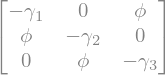

In [5]:
# Show F
F

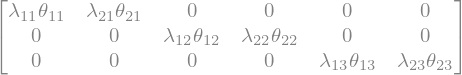

In [6]:
# Show E
E

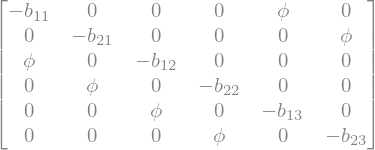

In [7]:
# Show B
B

In [8]:
# Build full matrix

# Build U component: Movement of infecteds
Czeros = sympy.zeros(S*T, T)
U1 = np.hstack([B, Czeros])
U2 = np.hstack([E, F])
U = Matrix(np.vstack([U1, U2]))

# Build F component: Production of infecteds
Bzeros = sympy.zeros(S*T, S*T)
Ezeros = sympy.zeros(T, S*T)
Fzeros = sympy.zeros(T, T)
F1 = np.hstack([Bzeros, C])
F2 = np.hstack([Ezeros, Fzeros])
Ffull = Matrix(np.vstack([F1, F2]))

In [9]:
e1 = (C * (-F).inv() * E)
e1
#print(sympy.latex(e1))

⎡                  2                                             2            
⎢ S₁₁⋅γ₂⋅γ₃⋅λ₁₁⋅θ₁₁ ⋅β₁₁    S₁₁⋅γ₂⋅γ₃⋅λ₂₁⋅θ₁₁⋅θ₂₁⋅β₁₁   S₁₁⋅λ₁₂⋅φ ⋅θ₁₁⋅θ₁₂⋅β₁₁
⎢ ──────────────────────    ─────────────────────────   ──────────────────────
⎢                 3                           3                         3     
⎢     γ₁⋅γ₂⋅γ₃ - φ                γ₁⋅γ₂⋅γ₃ - φ              γ₁⋅γ₂⋅γ₃ - φ      
⎢                                                                             
⎢                                             2                  2            
⎢S₂₁⋅γ₂⋅γ₃⋅λ₁₁⋅θ₁₁⋅θ₂₁⋅β₂₁   S₂₁⋅γ₂⋅γ₃⋅λ₂₁⋅θ₂₁ ⋅β₂₁     S₂₁⋅λ₁₂⋅φ ⋅θ₁₂⋅θ₂₁⋅β₂₁
⎢─────────────────────────   ──────────────────────     ──────────────────────
⎢                  3                         3                          3     
⎢      γ₁⋅γ₂⋅γ₃ - φ              γ₁⋅γ₂⋅γ₃ - φ               γ₁⋅γ₂⋅γ₃ - φ      
⎢                                                                             
⎢                                                   

In [10]:
e1 * (-B.inv())

⎡                           2                          3                      
⎢  S₁₁⋅b₁₂⋅b₁₃⋅γ₂⋅γ₃⋅λ₁₁⋅θ₁₁ ⋅β₁₁         S₁₁⋅b₁₃⋅λ₁₂⋅φ ⋅θ₁₁⋅θ₁₂⋅β₁₁          
⎢────────────────────────────────── + ────────────────────────────────── + ───
⎢⎛               3⎞ ⎛            3⎞   ⎛               3⎞ ⎛            3⎞   ⎛  
⎢⎝b₁₁⋅b₁₂⋅b₁₃ - φ ⎠⋅⎝γ₁⋅γ₂⋅γ₃ - φ ⎠   ⎝b₁₁⋅b₁₂⋅b₁₃ - φ ⎠⋅⎝γ₁⋅γ₂⋅γ₃ - φ ⎠   ⎝b₁
⎢                                                                             
⎢                                                      3                      
⎢S₂₁⋅b₁₂⋅b₁₃⋅γ₂⋅γ₃⋅λ₁₁⋅θ₁₁⋅θ₂₁⋅β₂₁        S₂₁⋅b₁₃⋅λ₁₂⋅φ ⋅θ₁₂⋅θ₂₁⋅β₂₁          
⎢────────────────────────────────── + ────────────────────────────────── + ───
⎢⎛               3⎞ ⎛            3⎞   ⎛               3⎞ ⎛            3⎞   ⎛  
⎢⎝b₁₁⋅b₁₂⋅b₁₃ - φ ⎠⋅⎝γ₁⋅γ₂⋅γ₃ - φ ⎠   ⎝b₁₁⋅b₁₂⋅b₁₃ - φ ⎠⋅⎝γ₁⋅γ₂⋅γ₃ - φ ⎠   ⎝b₁
⎢                                                                             
⎢                                                   

## Build the matrix from $R_0$ values

In [11]:
γs_new = γs + ϕ

# Get phi indices by computing clockwise distance
T1 = np.tile(np.arange(1, T + 1), T).reshape(T, T)
T2 = T1.T
temp1 = np.abs(T2 - T1) 
temp2 = T - np.abs(T2 - T1)
temp1[np.triu_indices(T)] = temp2[np.triu_indices(T)]
temp1[np.diag_indices(T)] = 0
phi_power = Matrix(ϕ**temp1)

# Get the gamma indices
ind_mat = np.empty((T, T), dtype="object")

# Establish the diagonal
for i in range(T):
    include = np.delete(np.arange(0, T), i)
    ind_mat[i, i] = np.prod(γs_new[include])

for j in range(T): # Columns

    for i in range(T): # Rows
        
        if i > j and temp1[i, j] != (T - 1):
            
            ind_mat[i, j] = np.prod(np.delete(γs_new, np.r_[np.arange(j, i + 1)]))
        
        elif i < j and temp1[i, j] != (T - 1):
            
            ind_mat[i, j] = np.prod(γs_new[np.arange(i + 1, j)])
        
        elif i != j:
            ind_mat[i, j] = 1

# Expand this for multiple species. Every value should be a 2 x 2 block matrix

combined_mat = sympy.matrices.dense.matrix_multiply_elementwise(Matrix(ind_mat), phi_power)

full_rate_mat = np.empty((T, T), dtype="object")
for i in range(T):
    for j in range(T):
        full_rate_mat[i, j] = np.repeat(combined_mat[i, j], S*S).reshape((S, S))

# Make a nested list for block matrix
full_rate_list = [list(full_rate_mat[i, :]) for i in range(T)]
rate_mat = Matrix(np.block(full_rate_list))

# Fixed rate
fr = (1 / (np.prod(γs_new) - ϕ**T))
rate_mat = rate_mat * fr

In [12]:
R0s = np.atleast_1d(np.array(symbols(" ".join(["R0_" + np.str_(j) + np.str_(i)
                                              for i in range(1, T + 1)
                                              for j in range(1, S + 1)]))))

In [13]:
M1 = Matrix(np.diag(R0s * bs * (1 / (λs*θs)) * np.repeat(γs, S))) * (rate_mat)
M2 = sympy.matrices.dense.matrix_multiply_elementwise(M1, Matrix(np.tile(λs*θs, S*T).reshape((S*T, S*T))))


# Build the upper left-hand corner matrix
Bnew = sympy.diag(*(-(bs + ϕ)))

for i in range(T):
    
    if i != 0:
        Bnew[i*S:(i*S + S), (i - 1)*S:((i - 1)*S + S)] = phi_mat
    
    # Add upper right-hand corner
    if i == (T - 1):
        Bnew[0:S, (T - 1)*S:((T - 1)*S + S)] = phi_mat

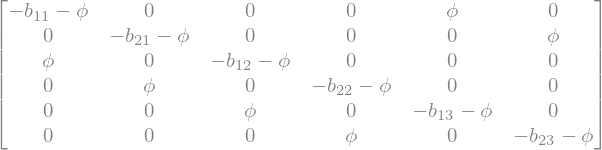

In [14]:
Bnew

In [15]:
(C * (-F).inv() * E) # Note that \gamma_i are really \gamma_i + \phi

⎡                  2                                             2            
⎢ S₁₁⋅γ₂⋅γ₃⋅λ₁₁⋅θ₁₁ ⋅β₁₁    S₁₁⋅γ₂⋅γ₃⋅λ₂₁⋅θ₁₁⋅θ₂₁⋅β₁₁   S₁₁⋅λ₁₂⋅φ ⋅θ₁₁⋅θ₁₂⋅β₁₁
⎢ ──────────────────────    ─────────────────────────   ──────────────────────
⎢                 3                           3                         3     
⎢     γ₁⋅γ₂⋅γ₃ - φ                γ₁⋅γ₂⋅γ₃ - φ              γ₁⋅γ₂⋅γ₃ - φ      
⎢                                                                             
⎢                                             2                  2            
⎢S₂₁⋅γ₂⋅γ₃⋅λ₁₁⋅θ₁₁⋅θ₂₁⋅β₂₁   S₂₁⋅γ₂⋅γ₃⋅λ₂₁⋅θ₂₁ ⋅β₂₁     S₂₁⋅λ₁₂⋅φ ⋅θ₁₂⋅θ₂₁⋅β₂₁
⎢─────────────────────────   ──────────────────────     ──────────────────────
⎢                  3                         3                          3     
⎢      γ₁⋅γ₂⋅γ₃ - φ              γ₁⋅γ₂⋅γ₃ - φ               γ₁⋅γ₂⋅γ₃ - φ      
⎢                                                                             
⎢                                                   

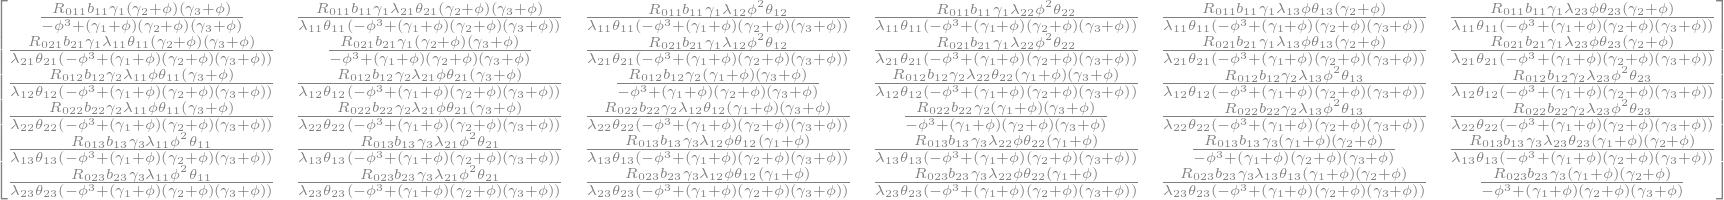

In [16]:
M2

In [19]:
Rmat = (M2 * (-Bnew.inv()))

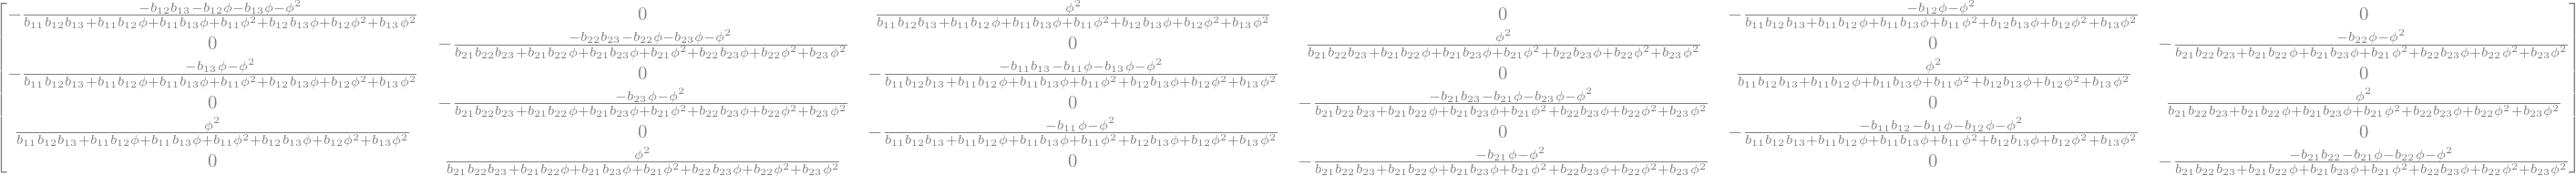

In [28]:
(-Bnew.inv())

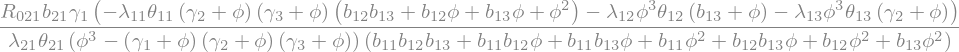

In [33]:
Rmat[1, 0].simplify()

In [81]:
#print(sympy.latex(M2[:6, 3:]))

You can clearly see the equivalency between `M2` and `(C * (-F).inv() * E)`

### Develop the $R_0$ model when habitat overlap is not complete

We know repeat the steps above with the model equation S2, that includes habitat overlap between species $s$ and $i$, $\omega_{si}$.

In [9]:
T = 3 # Time periods
S = 2 # Number of species
#print(sympy.latex(e1))

## Set-up the variables needed for the next-generation matrix

Ss = np.atleast_1d(np.array(symbols(" ".join(["S_" + np.str_(j) + np.str_(i)
                                              for i in range(1, T + 1)
                                              for j in range(1, S + 1)]))))

βs = np.atleast_1d(np.array(symbols(" ".join(["β_" + np.str_(j) + np.str_(i)
                                              for i in range(1, T + 1)
                                              for j in range(1, S + 1)]))))

bs = np.atleast_1d(np.array(symbols(" ".join(["b_" + np.str_(j) + np.str_(i)
                                              for i in range(1, T + 1)
                                              for j in range(1, S + 1)]))))

νs = np.atleast_1d(np.array(symbols(" ".join(["nu_" + np.str_(j) + np.str_(i)
                                              for i in range(1, T + 1)
                                              for j in range(1, S + 1)]))))

ds = np.atleast_1d(np.array(symbols(" ".join(["d_" + np.str_(j) + np.str_(i)
                                              for i in range(1, T + 1)
                                              for j in range(1, S + 1)]))))

λs = np.atleast_1d(np.array(symbols(" ".join(["lambda_" + np.str_(j) + np.str_(i)
                                              for i in range(1, T + 1)
                                              for j in range(1, S + 1)]))))

θs = np.atleast_1d(np.array(symbols(" ".join(["theta_" + np.str_(j) + np.str_(i)
                                              for i in range(1, T + 1)
                                              for j in range(1, S + 1)]))))

γs = np.array(symbols(" ".join(["gamma_" + np.str_(i) for i in range(1, T + 1)])))

# Omegas do not vary temporally
ωs = np.atleast_1d(np.array(symbols(" ".join(["omega_" + np.str_(j) + np.str_(i)
                                              for i in range(1, S + 1)
                                              for j in range(1, S + 1)]))))

ϕ = symbols("phi")

In [10]:
phi_mat = ϕ * eye(S)

# Part 1

# Build the upper left-hand corner matrix
B = sympy.diag(*(-(bs))) # Note the + phi is implied here

for i in range(T):
    
    if i != 0:
        B[i*S:(i*S + S), (i - 1)*S:((i - 1)*S + S)] = phi_mat
    
    # Add upper right-hand corner
    if i == (T - 1):
        B[0:S, (T - 1)*S:((T - 1)*S + S)] = phi_mat

## Part 2        
E = sympy.zeros(S*T, S*T)
E = E.diag(λs * θs)

## Part 3
F = sympy.diag(*-(np.repeat(γs, S))) # Note the + phi is implied here

for i in range(T):
    
    if i != 0:
        F[i*S:(i*S + S), (i - 1)*S:((i - 1)*S + S)] = phi_mat
    
    # Add upper right-hand corner
    if i == (T - 1):
        F[0:S, (T - 1)*S:((T - 1)*S + S)] = phi_mat

## Part 4
C = sympy.zeros(S*T, S*T)
for i in range(T):
    
    C[i*S:(i*S + S), i*S:(i*S + S)] = np.tile(βs[(i*S):(i*S + S)][:, np.newaxis] * θs[(i*S):(i*S + S)][:, np.newaxis] * Ss[(i*S):(i*S + S)][:, np.newaxis], 2) * ωs.reshape((S, S))



In [11]:
# Print results
e1 = (C * (-F).inv() * E)
e1

⎡                      2                                                     2                              2          
⎢ S₁₁⋅γ₂⋅γ₃⋅λ₁₁⋅ω₁₁⋅θ₁₁ ⋅β₁₁    S₁₁⋅γ₂⋅γ₃⋅λ₂₁⋅ω₂₁⋅θ₁₁⋅θ₂₁⋅β₁₁   S₁₁⋅λ₁₂⋅ω₁₁⋅φ ⋅θ₁₁⋅θ₁₂⋅β₁₁     S₁₁⋅λ₂₂⋅ω₂₁⋅φ ⋅θ₁₁⋅θ₂₂⋅β
⎢ ──────────────────────────    ─────────────────────────────   ──────────────────────────     ────────────────────────
⎢                   3                               3                             3                              3     
⎢       γ₁⋅γ₂⋅γ₃ - φ                    γ₁⋅γ₂⋅γ₃ - φ                  γ₁⋅γ₂⋅γ₃ - φ                   γ₁⋅γ₂⋅γ₃ - φ      
⎢                                                                                                                      
⎢                                                     2                      2                              2          
⎢S₂₁⋅γ₂⋅γ₃⋅λ₁₁⋅ω₁₂⋅θ₁₁⋅θ₂₁⋅β₂₁   S₂₁⋅γ₂⋅γ₃⋅λ₂₁⋅ω₂₂⋅θ₂₁ ⋅β₂₁     S₂₁⋅λ₁₂⋅ω₁₂⋅φ ⋅θ₁₂⋅θ₂₁⋅β₂₁     S₂₁⋅λ₂₂⋅ω₂₂⋅φ ⋅θ₂₁⋅θ₂₂⋅β
⎢─────────────────────────────   ───────

## Make the next-generation matrix

In [12]:
γs_new = γs + ϕ

# Get phi indices by computing clockwise distance
T1 = np.tile(np.arange(1, T + 1), T).reshape(T, T)
T2 = T1.T
temp1 = np.abs(T2 - T1) 
temp2 = T - np.abs(T2 - T1)
temp1[np.triu_indices(T)] = temp2[np.triu_indices(T)]
temp1[np.diag_indices(T)] = 0
phi_power = Matrix(ϕ**temp1)

# Get the gamma indices
ind_mat = np.empty((T, T), dtype="object")

# Establish the diagonal
for i in range(T):
    include = np.delete(np.arange(0, T), i)
    ind_mat[i, i] = np.prod(γs_new[include])

for j in range(T): # Columns

    for i in range(T): # Rows
        
        if i > j and temp1[i, j] != (T - 1):
            
            ind_mat[i, j] = np.prod(np.delete(γs_new, np.r_[np.arange(j, i + 1)]))
        
        elif i < j and temp1[i, j] != (T - 1):
            
            ind_mat[i, j] = np.prod(γs_new[np.arange(i + 1, j)])
        
        elif i != j:
            ind_mat[i, j] = 1

# Expand this for multiple species. Every value should be a 2 x 2 block matrix

combined_mat = sympy.matrices.dense.matrix_multiply_elementwise(Matrix(ind_mat), phi_power)

full_rate_mat = np.empty((T, T), dtype="object")
for i in range(T):
    for j in range(T):
        full_rate_mat[i, j] = np.repeat(combined_mat[i, j], S*S).reshape((S, S))

# Make a nested list for block matrix
full_rate_list = [list(full_rate_mat[i, :]) for i in range(T)]
rate_mat = Matrix(np.block(full_rate_list))

# Fixed rate
fr = (1 / (np.prod(γs_new) - ϕ**T))
rate_mat = rate_mat * fr

In [13]:
R0s = np.atleast_1d(np.array(symbols(" ".join(["R0_" + np.str_(j) + np.str_(i)
                                              for i in range(1, T + 1)
                                              for j in range(1, S + 1)]))))

In [14]:
M1 = Matrix(np.diag(R0s * bs * (1 / (λs*θs)) * np.repeat(γs, S))) * (rate_mat)
M2 = sympy.matrices.dense.matrix_multiply_elementwise(M1, Matrix(np.tile(λs*θs, S*T).reshape((S*T, S*T))))
omega_mat = np.vstack([np.tile(ωs.reshape((S, S)), T) for i in range(T)])
M2 = sympy.matrices.dense.matrix_multiply_elementwise(M2, Matrix(omega_mat))

# Build the upper left-hand corner matrix
Bnew = sympy.diag(*(-(bs + ϕ)))

for i in range(T):
    
    if i != 0:
        Bnew[i*S:(i*S + S), (i - 1)*S:((i - 1)*S + S)] = phi_mat
    
    # Add upper right-hand corner
    if i == (T - 1):
        Bnew[0:S, (T - 1)*S:((T - 1)*S + S)] = phi_mat

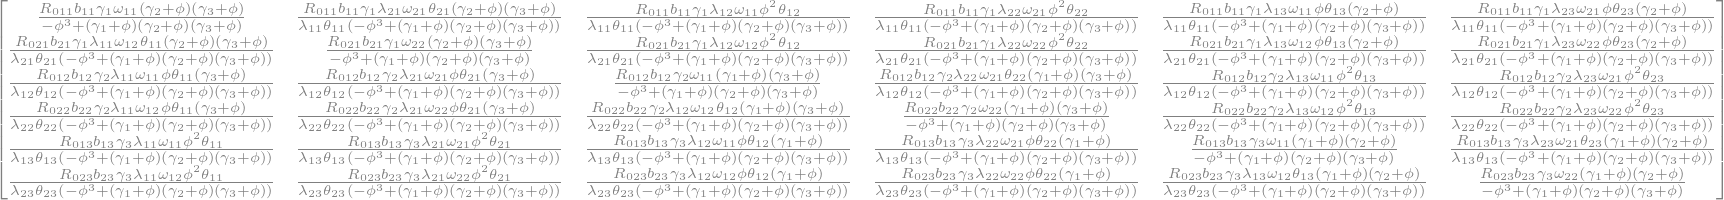

In [186]:
# M2 is equivalent to e1 (though note the \phi parameters are implicit in e1) but with R_{0s\tau} explicitly
# included
M2

## Test $R_0$ approach by applying to a seasonal ODE model

Here, wesimu late a seasonally forced ODE model and demonstrate our approaches ability to recover the time-varying species-level $R_0$ values from the the observed data streams as discussed in the manuscript.

We are going to use a complete overlap model to illustrate the approach: $\omega = 1$ for all pairs of species.

In [15]:
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def seasonal_fxn(time, min_val, max_val, year_length=365, shift=0):
    """ 
    Simple sinusoidal seasonal fxn to add seasonal variability to parameters 
    
    Parameters
    ----------
    time : float or array-like
        Time in the season
    min_val : float
        Minimum value the parameter can take
    max_val : float
        Maximum value the parameter can take
    year_length : float
        The period of the season. I.e., when the pattern starts repeating
    shift : float
        Shifts the peak within the season
    """

    a = ((max_val - min_val) / 2)
    value = a*(1 - np.cos(2*np.pi*(time - shift) / year_length)) + min_val
    return(value)

def multispecies_ode(y, t, p):
    """
    Multi-species, seasonal ODE with a period of 1.
    
    This function allows for seasonal variability in beta for both species and lambda.
    """
    
    # Two species
    S1 = y[0]
    I1 = y[1]
    S2 = y[2]
    I2 = y[3]
    Z = y[4]
    
    tyear = t % 1 # The period of a year is 1
    
    # Seasonally varying transmission rates
    beta1 = seasonal_fxn(tyear, p['beta1']*p['bmin1'], p['beta1']*p['bmax1'], year_length=1, shift=p['bshift1'])
    beta2 = seasonal_fxn(tyear, p['beta2']*p['bmin2'], p['beta2']*p['bmax2'], year_length=1, shift=p['bshift2'])
    
    # Loss of infection rates
    nu1 = p['nu1']
    nu2 = p['nu2']
    
    # Seasonally varying shedding rates
    l1 = seasonal_fxn(tyear, p['l1']*p['lmin1'], p['l1']*p['lmax1'], year_length=1, shift=p['lshift1'])#p['l1']
    l2 = seasonal_fxn(tyear, p['l2']*p['lmin2'], p['l2']*p['lmax2'], year_length=1, shift=p['lshift2'])
    
    # Zoospore death rate
    dz = p['dz']
    
    # Probability of the being in the aquatic habitat
    t1 = p['theta1']
    t2 = p['theta2']
    
    # Simple ODEs that ignore demography
    dS1 = -beta1*t1*S1*Z + nu1*I1
    dI1 = beta1*t1*S1*Z - nu1*I1
    dS2 = -beta2*t2*S2*Z + nu2*I2
    dI2 = beta2*t2*S2*Z - nu2*I2
    dZ = l1*t1*I1 + l2*t2*I2 - dz*Z
    
    return([dS1, dI1, dS2, dI2, dZ])

Text(0, 0.5, '$R_{0, s}(\\tau)$')

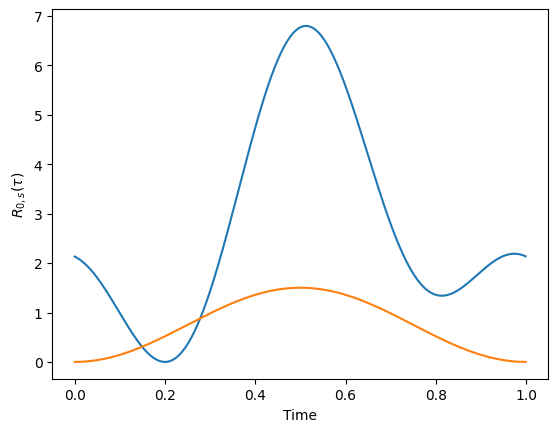

In [18]:
# Model parameters for a seasonal processes
# Both transmision rate and shedding are varying through
# time for both species
p = dict(beta1=1, bmin1=0, bmax1=1.5, bshift1=0.2,
         beta2=0.3, bmin2=0, bmax2=1, bshift2=0,
         nu1=10, nu2=10, 
         l1=200, lmin1=0.1, lmax1=1, lshift1=-0.2,
         l2=100, lmin2=1, lmax2=1, lshift2=0,
         theta1=1, theta2=1,
         dz=20)

# Test approach with no seasonal processes
# p = dict(beta1=1.5, bmin1=1, bmax1=1, bshift1=0.2,
#          beta2=1, bmin2=1, bmax2=1, bshift2=0,
#          nu1=10, nu2=10, 
#          l1=200, lmin1=1, lmax1=1, lshift1=-0.2,
#          l2=100, lmin2=1, lmax2=1, lshift2=0,
#          theta1=1, theta2=1,
#          dz=20)

init_vals = np.array([10, 0.01, 10, 0.01, 0])

# Exact species-level, time-varying R0
dt = 0.001
time_in_year = np.arange(0, 1, step=dt)
beta1 = seasonal_fxn(time_in_year, p['beta1']*p['bmin1'], p['beta1']*p['bmax1'], year_length=1, shift=p['bshift1'])
beta2 = seasonal_fxn(time_in_year, p['beta2']*p['bmin2'], p['beta2']*p['bmax2'], year_length=1, shift=p['bshift2'])
l1 = seasonal_fxn(time_in_year, p['l1']*p['lmin1'], p['l1']*p['lmax1'], year_length=1, shift=p['lshift1'])
l2 = seasonal_fxn(time_in_year, p['l2']*p['lmin2'], p['l2']*p['lmax2'], year_length=1, shift=p['lshift2'])

# Plot the true R_{0} values
R01 = (init_vals[:2].sum() * beta1 * l1 * p['theta1']**2) / (p['nu1'] * p['dz'])
R02 = (init_vals[2:4].sum() * beta2 * l2 * p['theta2']**2) / (p['nu2'] * p['dz'])
plt.plot(time_in_year, R01)
plt.plot(time_in_year, R02)
plt.xlabel("Time")
plt.ylabel(r"$R_{0, s}(\tau)$")

In [19]:
# Simulate the model
max_year = 10
time = np.arange(0, max_year, step=dt)

res = odeint(multispecies_ode, init_vals, time, (p, ))
res_df = pd.DataFrame(res, columns=["S1", "I1", "S2", "I2", "Z"]).assign(time=time).set_index("time")#.drop(columns='Z')

# Calculate prevalence
res_df['P1'] = res_df['I1'] / (res_df['I1'] + res_df['S1'])
res_df['P2'] = res_df['I2'] / (res_df['I2'] + res_df['S2'])

Text(0, 0.5, 'Prevalance')

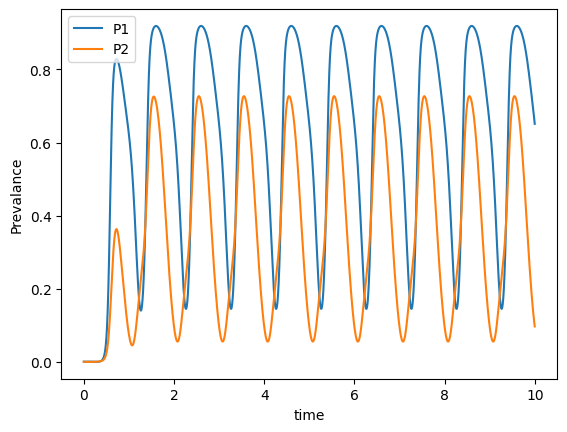

In [20]:
# Plot the species-level prevalence
ax = res_df[['P1', 'P2']].plot()
ax.set_ylabel("Prevalance")

Set-up the simulated "data" to be use with our method and equation

Text(0, 0.5, 'Prevalence')

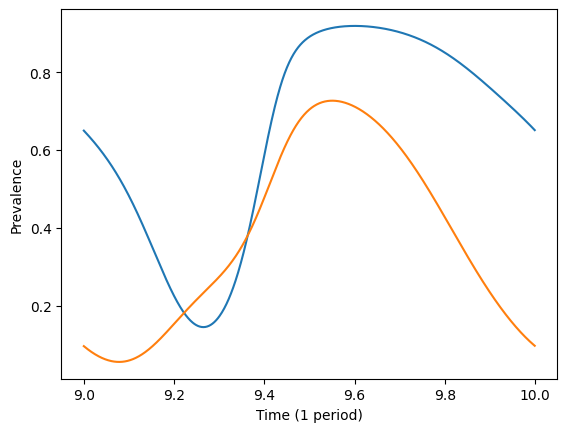

In [21]:
# Extract equilibrium prevalence "data"
lower = np.argmin(res_df.index.values < (max_year - 1))
ttime = res_df.index[lower:].values

# Density
density1 = res_df.iloc[lower:, 0:2].sum(axis=1).values
density2 = res_df.iloc[lower:, 2:4].sum(axis=1).values

# Prevalence
prev1 = (res_df.iloc[lower:, 1] / density1).values
prev2 = (res_df.iloc[lower:, 3] / density2).values

# Intensity (shedding rate)
n = len(prev1)
intensity1 = l1
intensity2 = l2

# Space use
space_use1 = np.repeat(p['theta1'], n)
space_use2 = np.repeat(p['theta2'], n)

# Interspecific vs. intraspecific: Set all to 1 for this model
overlap_mat = np.repeat(1, 2*2).reshape((2, 2))

# Stack together
all_intensity = np.vstack([intensity1, intensity2])
all_prev = np.vstack([prev1, prev2])
all_density = np.vstack([density1, density2])
all_space_use = np.vstack([space_use1, space_use2])

# Get phi, bvals, and pathogen decay
phi = 1 / (ttime[1] - ttime[0])
bvals = np.vstack([np.repeat(n, all_density.shape[1]) for n in np.array([p['nu1'], p['nu2']])])
path_decay = np.repeat(p['dz'], all_density.shape[1])

# Plot the equilibrium prevalence over the period
time = res_df.iloc[lower:, 0].index
plt.plot(time, prev1)
plt.plot(time, prev2)
plt.xlabel("Time (1 period)")
plt.ylabel("Prevalence")

Text(0, 0.5, 'Zoospore density')

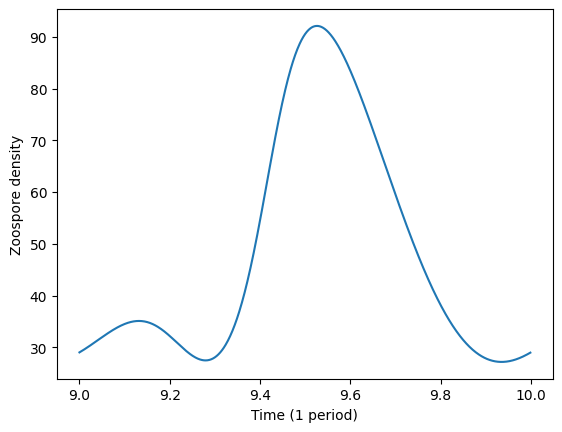

In [23]:
# Plot the model predicted Zoospore density at the seasonal equilibrium
Zode = res_df.Z.values[lower:]
plt.plot(time, Zode)
plt.xlabel("Time (1 period)")
plt.ylabel("Zoospore density")

Text(0, 0.5, '$dZ / d \\tau$')

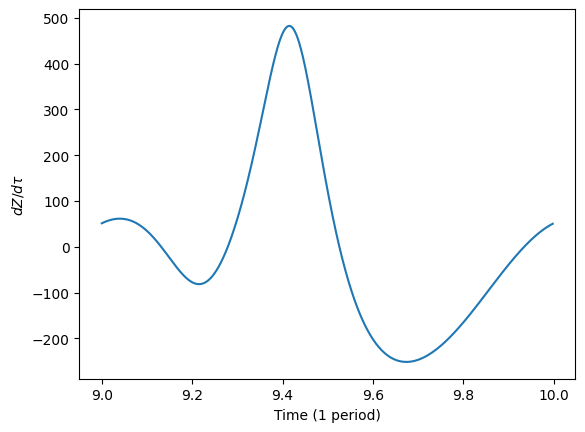

In [24]:
# Calculate the derivative of Z over an equilibrium season
dzdt = (Zode[1:] - Zode[:-1]) / dt
plt.plot(time[:-1], dzdt)
plt.xlabel("Time (1 period)")
plt.ylabel(r"$dZ / d \tau$")

In [25]:
import seasonal_R0_analysis_by_site as sr
import importlib
importlib.reload(sr)

period = 1 # Length of period
num_prior_periods = 2 # This sets how far "back" we go to approximate Z

# Check the derivatives of dzdt from the data for each species
all_dzdt = sr.get_all_dzdt(all_intensity, all_prev, all_density, all_space_use,
                           path_decay, dt, period=1, num_prior_periods=2)

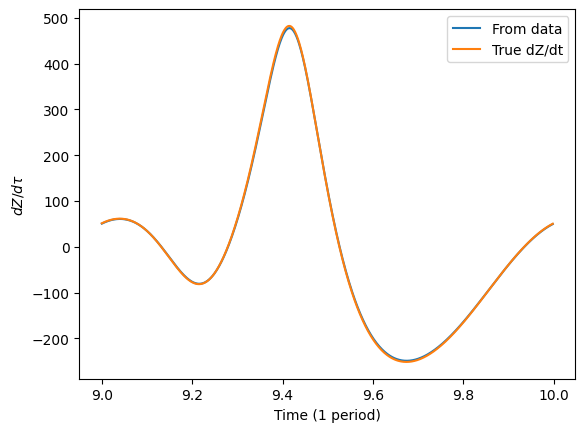

In [26]:
dzdt_other = all_dzdt.sum(axis=0) # Add the derivatives to the get the total
plt.plot(time[:-1], dzdt_other, label="From data")
plt.plot(time[:-1], dzdt, label="True dZ/dt")
plt.xlabel("Time (1 period)")
plt.ylabel(r"$dZ / d\tau$")
plt.legend()

Our approach is getting back the true dZ_i / dt from the data streams provided. 

### Get the species-level $R_{0, s}(\tau)$

In [27]:
import seasonal_R0_analysis_by_site as sr
import importlib
importlib.reload(sr)

# This is with the dzdt calculcated from the observed values, i.e., the data
R0t_values = sr.get_species_level_seasonal_R0_full(all_intensity, all_prev, 
                                              all_density, all_space_use, overlap_mat,
                                              bvals, phi, path_decay, all_dzdt)


Text(0, 0.5, '$R_{0, s}(\\tau)$')

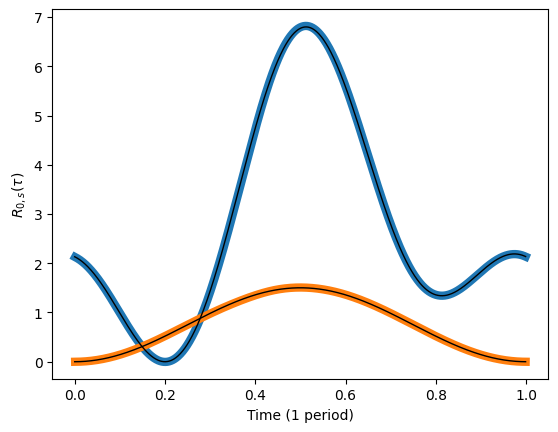

In [28]:
# Compare the two versions of species-level R0

colors1 = sns.color_palette()[:2]

for i in range(2):
    plt.plot(ttime[1:] % 1, R0t_values[i, :], '-', linewidth=6, color=colors1[i])

# Plot the true species
plt.plot(time_in_year, R01, color='black', lw=1)
plt.plot(time_in_year, R02, color='black', lw=1)
plt.xlabel("Time (1 period)")
plt.ylabel(r"$R_{0, s}(\tau)$")

The equation from the manuscript can get back the known (black) species-level $R_{0, s}(\tau)$ values.

# Calculate $R_{0, T}$ using the approach from the manuscript

In [29]:
import importlib
import seasonal_R0_analysis_by_site as sr
importlib.reload(sr)

# Get the seasonal R0
S = R0t_values.shape[0]
T = R0t_values.shape[1]
R0s = R0t_values.T.ravel()
λs = all_intensity[:, 1:].T.ravel()
θs = all_space_use[:, 1:].T.ravel()
γs = np.repeat(p['dz'], T)
bs = np.vstack([np.repeat(p['nu1'], T), np.repeat(p['nu2'], T)]).T.ravel()
ωs = overlap_mat.ravel()

In [30]:
# Note that you can scale the rates however you want as long as you do it consistently. It won't change R0
# Scaling is essential to prevent overflow errors when the number of time increments
# within a period is large
scale = 1000
R, B, M2 = sr.get_seasonal_R_matrix(S, T, R0s, phi / scale, γs / scale, λs / scale, bs / scale, θs, ωs)

In [31]:
# Compute R_{0, T}
R0_base = np.max(np.abs(np.linalg.eigvals(R)))
R0_base

## Test different implementations of temporal control 

First, implement a temporal control by setting the species-level R0 values to zero and then computing $R_{0, T}$

In [32]:
# This is with the dzdt calculcated from the observed values, i.e., the data
R0t_values = sr.get_species_level_seasonal_R0_full(all_intensity, all_prev, 
                                              all_density, all_space_use, overlap_mat,
                                              bvals, phi, path_decay, all_dzdt)

# Get the vector of times that match the dimension of R0t_values
time_vals = (ttime % 1)[1:]
len(time_vals)

In [33]:
# Temporal control of transmission from a 0.4 to 0.6 within a year of T = 1.
ind = np.bitwise_and(time_vals > 0.4, time_vals < 0.6)
args_inds = np.where(ind)[0]
R0t_values[:, ind] = 0 

# Get the seasonal R0
S = R0t_values.shape[0]
T = R0t_values.shape[1]
R0s = R0t_values.T.ravel()
λs = all_intensity[:, 1:].T.ravel()
θs = all_space_use[:, 1:].T.ravel()
γs = np.repeat(p['dz'], T)
bs = np.vstack([np.repeat(p['nu1'], T), np.repeat(p['nu2'], T)]).T.ravel()
ωs = overlap_mat.ravel()

# Recalculate R0 after removing transmission on all species for a time period
scale = 1000
R, B, M2 = sr.get_seasonal_R_matrix(S, T, R0s, phi / scale, γs / scale, λs / scale, bs / scale, θs, ωs)
R0_control = np.max(np.abs(np.linalg.eigvals(R)))
R0_control

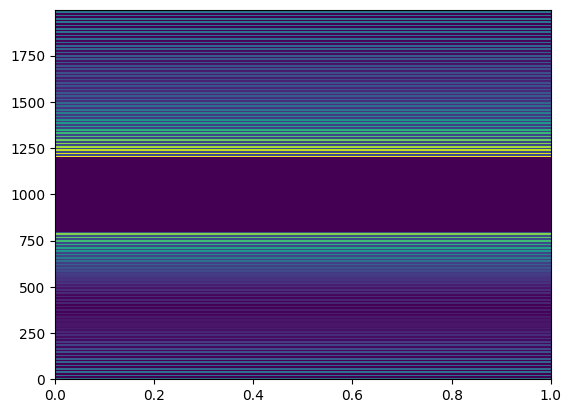

In [34]:
# Visualize the species level R0s, raveled. The gap is where all species R0s are set to zero
plt.pcolormesh(R0s[:, np.newaxis])

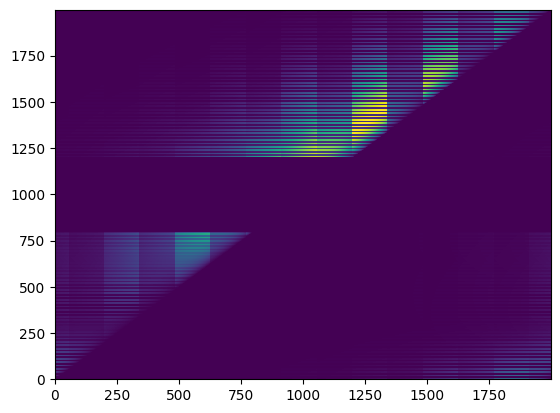

In [35]:
# Visualize the next-generation matrix
plt.pcolormesh(R)

In [36]:
# Effect of control
1 - (R0_control / R0_base)

Second, do the same thing as above, but work directly with the R matrix. Do we get the same answer?

In [37]:
R0t_values = sr.get_species_level_seasonal_R0_full(all_intensity, all_prev, 
                                              all_density, all_space_use, overlap_mat,
                                              bvals, phi, path_decay, all_dzdt)
# Get the seasonal R0
S = R0t_values.shape[0]
T = R0t_values.shape[1]
R0s = R0t_values.T.ravel()
λs = all_intensity[:, 1:].T.ravel()
θs = all_space_use[:, 1:].T.ravel()
γs = np.repeat(p['dz'], T)
bs = np.vstack([np.repeat(p['nu1'], T), np.repeat(p['nu2'], T)]).T.ravel()
ωs = overlap_mat.ravel()

# Recalculate R
scale = 1000
R, B, M2 = sr.get_seasonal_R_matrix(S, T, R0s, phi / scale, γs / scale, λs / scale, bs / scale, θs, ωs)

In [38]:
# Identify the rows in the R matrix that need to be set to zero
arg_inds = np.where(ind)[0]
set_to_zero = [np.arange(t + i, t + i + 2) + arg_inds[0] for i, t in enumerate(arg_inds)]
R[set_to_zero, :] = 0

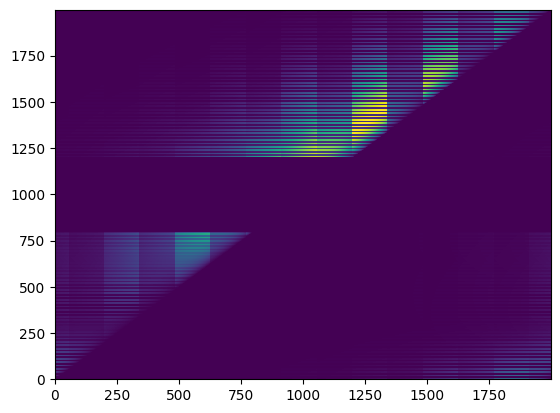

In [39]:
plt.pcolormesh(R)

In [40]:
np.max(np.abs(np.linalg.eigvals(R)))

You get the same answer.  Confirmation that the temporal control can be done directly on the R matrix.